In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_batch = 10
val_batch = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Data/flowers/flowers',
        target_size=(180, 180),
        batch_size=train_batch,
        class_mode='sparse',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Data/flowers/flowers',
        target_size=(180, 180),
        batch_size=val_batch,
        class_mode='sparse',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle = True)

Found 2597 images belonging to 5 classes.
Found 1726 images belonging to 5 classes.


In [4]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [5]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [6]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [7]:
train_generator[31][1]

array([4., 4., 0., 4., 3., 4., 4., 1., 2., 4.], dtype=float32)

In [8]:
#Model building

model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [9]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [10]:
with tf.device('/device:GPU:0'):
  history = model.fit(
      train_generator,
      steps_per_epoch = 20,
      batch_size = train_batch,
      validation_data = validation_generator,
      validation_batch_size = val_batch,
      epochs=20)

Epoch 1/20
20/20 [==============================] - 130s 7s/step - loss: 4.6040 - accuracy: 0.2097 - val_loss: 1.6095 - val_accuracy: 0.2289
Epoch 2/20
20/20 [==============================] - 40s 2s/step - loss: 1.6088 - accuracy: 0.2076 - val_loss: 1.6083 - val_accuracy: 0.2283
Epoch 3/20
20/20 [==============================] - 34s 2s/step - loss: 1.6085 - accuracy: 0.2271 - val_loss: 1.6075 - val_accuracy: 0.2271
Epoch 4/20
20/20 [==============================] - 30s 2s/step - loss: 1.6065 - accuracy: 0.2835 - val_loss: 1.6067 - val_accuracy: 0.2433
Epoch 5/20
20/20 [==============================] - 33s 2s/step - loss: 1.6102 - accuracy: 0.2109 - val_loss: 1.6065 - val_accuracy: 0.2433
Epoch 6/20
20/20 [==============================] - 30s 2s/step - loss: 1.6049 - accuracy: 0.2369 - val_loss: 1.6060 - val_accuracy: 0.2433
Epoch 7/20
20/20 [==============================] - 25s 1s/step - loss: 1.6080 - accuracy: 0.2084 - val_loss: 1.6056 - val_accuracy: 0.2433
Epoch 8/20
20/20 [=

In [11]:
model.evaluate(validation_generator)

54/54 [==============================] - 7s 137ms/step - loss: 1.6006 - accuracy: 0.2433


[1.6005592346191406, 0.24333719909191132]

In [15]:
x = history.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

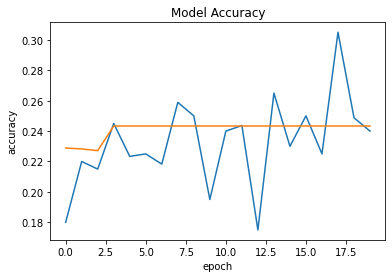

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

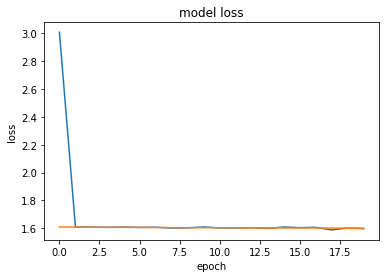

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [26]:
y_pred1 = model.predict(validation_generator)

In [27]:
y_pred1

array([[0.18974493, 0.22372817, 0.18967058, 0.17964907, 0.21720727],
       [0.18974493, 0.22372817, 0.18967058, 0.17964907, 0.21720727],
       [0.18974493, 0.22372817, 0.18967058, 0.17964907, 0.21720727],
       ...,
       [0.18974493, 0.22372817, 0.18967058, 0.17964907, 0.21720727],
       [0.18974493, 0.22372817, 0.18967058, 0.17964907, 0.21720727],
       [0.18974493, 0.22372817, 0.18967058, 0.17964907, 0.21720727]],
      dtype=float32)